#Introduction à PyTorch :

Ce TP donne une initiation auframework de Machine/Deep Learning PyTorch en utilisant leserviceGoogle Colab. Ce TP a pour objectifs :
- Comprendre la bibliothèque Tensor PyTorch et les réseaux de neurones.
- Construire et entrainer un réseaux de neurones pour la classification des images.

##PyTorch :

*PyTorch* est une bibliothèque de Machine/Deep Learning qui lie la ré-utilisabilité et la performance des outils de  Machine/Deep Learning :
- PyTorch fournit un style de programmation imp ́eratif et ”Pythonic” qui prend en charge lecode en tant que modèle.
- PyTorch facilite le d ́ebogage et est compatible avec d’autres bibliothèques informatiques scientifiques populaire.
- PyTorch prend en charge les accélérateurs matériels tels que comme GPU.  


Nous allons aborder quelques aspect lies aux Deep Learning en utilisant PyTorch.  
Nous finironspar un exemple d’utilisation de ces mod`eles pour la classification d’images sur plusieurs platformes matèriels.

##Google Colab :
Google Colaboratory plus communément appele  *Google  Colab* ou tout simplement *Colab* est un projet de recherche pour le prototypage de modèles de Machine Learning sur des plates-formes matérielles puissantes telles que les GPU et les TPU. *Google Colab* fournit un environnement de notebook *Jupyter* sur serveur pour le développement interactif. Google Colab est gratuit à utiliser comme les autres produits du *G Suite*.

##Préparation de l'environnement de développement :
**NOTE** : comme Google Colaboratory est un service cloud de Google, il faut s'assurer d'avoir uncompte Gmail afin de pouvoir l'utiliser.  

- **Première connexion** : en utilisant un navigateur web, connectez-vous https://colab.research.google.com/en utilisant votre  compte  Gmail. Vous allez être redirige vers une page introduisant Google  Colab. Commencez à prendre en main quelques concepts basiques du developpement sous Colab : exécuter les cellules codes existantes, en rajouter  d'autres, ajouter des cellules Markdown, etc.  
- **Création d'un Notebook** : cliquez sur ***Fichier→Nouveau notebook***. Changez le nom du notebook en double-cliquant sur **Untitled** en haut à gauche de la page en le remplaçant par un nom du format suivant : **TP\[formation\]\[matière\]\[NOM\]\[PRENOM\]**. Ce notebook vous suivra tout au long du TP. Le notebook devra être rendu à la fin des TP.  
- **Importation d'un Notebook** : cliquez sur ***Fichier→Ouvrir*** un notebook.  Localisez le notebook que vous trouverez avec l'ennoncé et faites ouvrir aprés l'avoir renommer suivant lacharte pr ́ec ́edente. C'est plus simple de travailler sur le carnet donné en TP que de le recréer à zero.  
- **Création et exécution des cellules** : il existe principalement deux types  de cellules :
1. `+ Code` pour code Python ou commande notebook/shell
2. `+ Texte` pour code Markdown ou HTML  
Pour exécuter une cellule, il faut cliquer sur le boutton 'Play' à gauche de la cellule, utliser le raccourci ***Shift+Entrée***, ou cluquer sur `Exécution` puis `Exécuter le code selectionné`.
- **Environnement d'exécution CPU/GPU/TPU** : google colab offre principalement trois plateformes d'exécution : 1) CPU (noté `None`), 2) GPU, et 3) TPU.
Pour passer d'une platforme à une  autre, cliquez sur `Exécution`, `Modifier le type d'exécution`, le menu déroulant du `Accelerateur matériel` puis choisir la plateforme.

#Introduction au Deep Learning avec PyTorch
Cette introduction suppose la maitrise de la bibliothèque `numpy`.
##Installation PyTorch
Nous devrons d'abord installer la bibliothèque PyTorch. Vous pouvez le faire en utilisant la commande suivante :

In [ ]:
!pip3 install torch torchvision

###Tensors :
Un `Tensor` est une unité de stockage de données communément utilisée dans le domaine du Deep Learning. Comme `ndarray` dans `numpy`, un `Tensor` c'est généralement un tableau de `n` dimensions, adapté à une exécution sur GPU.  
Nous allons explorer quelques aspects sur les `Tensors`, en commençant par importer le package `torch` qui représente PyTorch.  

In [ ]:
from __future__ import print_function
import torch

Nou pouvons d'abord déclarer une matrice sans initialisation de ses valeurs.  
Nous déclarons une matrice sur PyTorch comme suit :

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 7.7052e+31],
        [7.2148e+22, 1.5766e-19, 1.0256e-08],
        [6.4456e-10, 3.0441e+12, 6.7735e-10],
        [4.1730e-08, 1.0623e-05, 1.2471e+16],
        [2.1707e-18, 7.0952e+22, 1.7748e+28]])


Lorsqu'une matrice non initialisée est créée, les valeurs qui étaient dans la mémoire allouée à ce moment-là apparaîtront comme valeurs initiales. Nous pouvons déclarer une matrice, aléatoirement initialisée avec des valeurs réelles comprises entre 0 et 1 :

In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1584, 0.1099, 0.5732],
        [0.2350, 0.8174, 0.8515],
        [0.9193, 0.7496, 0.1022],
        [0.4728, 0.3775, 0.5563],
        [0.4406, 0.6332, 0.4752]])


Pour créer une matrice aléatoirement initialisée avec des entiers générer entre 1 et 10 :

In [ ]:
x =  torch.randint(1, 10, (5, 3))
print(x)

tensor([[7, 5, 9],
        [8, 9, 5],
        [8, 9, 1],
        [7, 7, 3],
        [3, 6, 2]])


Déclarer une matrice remplie de zéros et de `dtype` (i.e. data type) long qui est un entier sur 64 bits :

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Nou pouvons s'assurer du type de la variable `x` en utilisant la fonction `type()` :

In [ ]:
type(x)

torch.Tensor

Nous pouvons créer un `Tensor` directement à partir des valeurs prédéfinies :

In [ ]:
x = torch.tensor([[0,1,2], [3,4,5], [6,7,8], [-6,-7,-8], [-3,-4,-5]])
print(x)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [-6, -7, -8],
        [-3, -4, -5]])


On peut créer un `tensor` basé sur un autre `tensor` existant. Ces méthodes réutilisent les propriétés du `tensor` d'entrée :

In [ ]:
x = x.new_zeros(5,3, dtype=torch.double)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


Voir https://pytorch.org/docs/stable/torch.html#torch.randint_like pour regénerer un `tensor` initialisé avec des valeurs aléatoires en se basant sur un `tensor` existant :

In [ ]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)

tensor([[-1.4855,  0.3980,  1.2063],
        [-1.7241, -0.5097, -0.3179],
        [-1.3815,  0.3371, -0.3689],
        [-0.4611,  0.6000,  0.0048],
        [ 0.7876, -0.4473, -0.0061]])


### Opérations sur les `Tensor`
Les opérations sur les `tensor` peuvent être directement appliquée sur ces dérniers comme suit :

In [ ]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.9970,  1.0638,  1.3792],
        [-1.4739, -0.0281,  0.2446],
        [-0.7459,  0.4403,  0.0281],
        [ 0.5092,  1.3625,  0.3414],
        [ 1.6273,  0.4517,  0.7133]])


Ou bien utiliser des fonctions prédéfinies de PyTorch :

In [ ]:
print(torch.add(x,y))

tensor([[-0.9970,  1.0638,  1.3792],
        [-1.4739, -0.0281,  0.2446],
        [-0.7459,  0.4403,  0.0281],
        [ 0.5092,  1.3625,  0.3414],
        [ 1.6273,  0.4517,  0.7133]])


Le résultat pourrait être récupéré en passant un `tensor` (noté `z`) comme argument :

In [ ]:
z = torch.empty(5,3)
torch.add(x,y,out=z)
print(z)

tensor([[-0.9970,  1.0638,  1.3792],
        [-1.4739, -0.0281,  0.2446],
        [-0.7459,  0.4403,  0.0281],
        [ 0.5092,  1.3625,  0.3414],
        [ 1.6273,  0.4517,  0.7133]])


Un opération sur un `tensor` pourrait être faite `in-place` (généralement suivi par `_`), c'est à dire que le résultat est stocké dans le `tensor` appelant de la fonction et repmlacera donc l'anciène valeur :

In [ ]:
y.add_(x)
print(y)

tensor([[-0.9970,  1.0638,  1.3792],
        [-1.4739, -0.0281,  0.2446],
        [-0.7459,  0.4403,  0.0281],
        [ 0.5092,  1.3625,  0.3414],
        [ 1.6273,  0.4517,  0.7133]])


Nous pouvons utiliser la notation de `numpy` pour manipuler les `tensor` sur PyTorch. Afficher la première colonne comme suit :

In [ ]:
print(y[:, 0])

tensor([-0.9970, -1.4739, -0.7459,  0.5092,  1.6273])


Il y a donc un lien entre les `tensor` PyTorch et les `NumPy Array`.  
Les modules `Torch Tensor` et `NumPy` partageront le même éspace mémoire (si le Torch Tensor est sur CPU), et changer l'un changera l'autre.  
On peut convertir un `tensor` PyTorch en un `array` Numpy commme suit :

In [ ]:
a = torch.rand(5)
print("a : ", a)
b = a.numpy()
print("b : ", b)

a :  tensor([0.9904, 0.3335, 0.7878, 0.2069, 0.2035])
b :  [0.99042624 0.33348954 0.78777456 0.2068674  0.2035135 ]


Si l'on change la valeur du `tensor` PyTorch, la valeur du `array` Numpy change également:

In [ ]:
a.add_(1)
print("a : ", a)
print("b : ", b)

a :  tensor([1.9904, 1.3335, 1.7878, 1.2069, 1.2035])
b :  [1.9904263 1.3334895 1.7877746 1.2068675 1.2035135]


On peut faire la conversion dans le sens inverse :

In [ ]:
import numpy as np
# Générer un tableau aléatoirement initilisé
a = np.random.rand(5)
# Convertir le tableau en un tensor PyTorch
b = torch.from_numpy(a)

np.add(a, 1, out=a)
print("a : ", a)
print("b : ", b)

a :  [1.98507774 1.46440571 1.35275244 1.6169123  1.91816485]
b :  tensor([1.9851, 1.4644, 1.3528, 1.6169, 1.9182], dtype=torch.float64)


Jusqu'à présent, tous les `tensor` créés sont traité sur CPU.  
`PyTorch` offre la possibilité de transférer les `tensor` sur GPU (c'est d'ailleurs la différence entre `Numpy` et `PyTorch`).  
Les `tensor` peuvent donc être transférés entre CPU <-> GPU en utilisant la méthode `.to()`.

###Les Tensors CUDA
Il faut d'abord changer le type de l'accélérateur matériel en GPU afin de pour utiliser les `CUDA tensor`.

In [ ]:
device = "cpu"
if torch.cuda.is_available():
  device = torch.device("cuda")
print(device)

cuda


On peut créer le `tensor` directement sur GPU en le passant en paramètre :

In [ ]:
%%time
x = torch.rand(5, device=device)
y = torch.ones(5, device=device)
x.add_(y)
print(x)

tensor([1.6873, 1.0522, 1.1272, 1.6027, 1.3956], device='cuda:0')
CPU times: user 47.1 ms, sys: 33 ms, total: 80.1 ms
Wall time: 354 ms


On peut créer le `tensor` sur CPU puis le transférer sur GPU :

***Excercise*** :
- Coder des functions de calcul des opérations élémentaires sur des matrices sur CPU et sur GPU en utilisant `torch` (e.g. `matrix_add_CPU(a, b), matrix_add_GPU(a,b)`.
- Mesurer les temps d'exécutions des fonctions codées puis comparer les en utilisant un histogramme `pyplot`.
- Que remarquiez-vous?

# exercice 1 :

## operation (add,dot,prod)

In [ ]:
def add_cpu(m1,m2,dim1,dim2,platform):
  platform=platform
  madd=torch.zeros(dim1, dim2,dtype=torch.int)
  for i in range(dim1):
    for j in range(dim2):
      madd[i,j]=m1[i,j]+m2[i,j]
  return madd

In [ ]:
def prod_cpu(m1,m2,dim1,dim2,platform):
  platform=platform
  mpod=torch.zeros(dim1, dim2,dtype=torch.int)
  for i in range(0,dim1-1):
    for j in range(0,dim2-1):
      mpod[i,j]=(m1[i,j]*m2[i,j])+(m1[i,j+1]*m2[i+1,j])
  return mpod

In [ ]:
def dot_cpu(m1,m2,dim1,dim2,platform):
  platform=platform
  madd=torch.zeros(dim1, dim2,dtype=torch.int)
  for i in range(dim1):
    for j in range(dim2):
      madd[i,j]=m1[i,j]*m2[i,j]
  return madd

# add cpu/gpu

## l'objectif c'est executer tout les operation par dimension et calculer leur(temps d'execution)

**add gpu (3x3)**

In [ ]:
import time
import numpy as np
platform="colab"
"""
m1_3 =  torch.randint(1, 5, (3, 3),device="cuda")
m2_3 =  torch.randint(1, 5, (3, 3),device="cuda")
m1_5 =  torch.randint(1, 5, (5, 5),device="cuda")
m2_5 =  torch.randint(1, 5, (5, 5),device="cuda")
m1_7 =  torch.randint(1, 5, (7, 7),device="cuda")
m2_7 =  torch.randint(1, 5, (7, 7),device="cuda")"""

m1_3 =  torch.randint(1, 5, (3, 3))
m2_3 =  torch.randint(1, 5, (3, 3))
m1_5 =  torch.randint(1, 5, (5, 5))
m2_5 =  torch.randint(1, 5, (5, 5))
m1_7 =  torch.randint(1, 5, (7, 7))
m2_7 =  torch.randint(1, 5, (7, 7))
print("m1_3",m1_3)
print("m2_3",m2_3)
print("---------------------")
print("m1_5",m1_5)
print("m2_5",m2_5)
print("---------------------")
print("m1_7",m1_7)
print("m2_7",m2_7)
add_gpu3=[]
for i in range(5):
  start_time_add_cuda3 = time.time()
  device = "cpu"
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(add_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_add_cuda3 = time.time()
  execution_time_add_cuda3 = end_time_add_cuda3 - start_time_add_cuda3
  if i !=0:
    add_gpu3.append(execution_time_add_cuda3)
  print("execution_time_add_cuda dim 3x3 ",execution_time_add_cuda3)

# Imprime les temps d'exécution moyens sur gpu
if len(add_gpu3) > 0:
    moyenne_add_gpu_times3=np.mean(add_gpu3)
    ecart_type_add_gpu_times3 = np.std(add_gpu3)
    print("Temps d'exécution moyen sur gpu 3x3:", moyenne_add_gpu_times3)
    print("Temps d'exécution ecart sur gpu: 3x3", ecart_type_add_gpu_times3)

m1_3 tensor([[1, 4, 3],
        [1, 4, 3],
        [3, 1, 2]])
m2_3 tensor([[4, 2, 4],
        [2, 4, 1],
        [2, 2, 2]])
---------------------
m1_5 tensor([[3, 2, 3, 2, 3],
        [3, 3, 1, 4, 1],
        [2, 1, 1, 2, 4],
        [4, 4, 2, 4, 2],
        [4, 4, 1, 1, 1]])
m2_5 tensor([[1, 4, 4, 1, 3],
        [2, 2, 4, 4, 2],
        [2, 4, 3, 1, 1],
        [4, 4, 3, 2, 2],
        [3, 3, 4, 4, 1]])
---------------------
m1_7 tensor([[4, 4, 4, 2, 2, 4, 3],
        [2, 1, 2, 4, 3, 3, 2],
        [1, 3, 1, 2, 2, 2, 2],
        [2, 4, 4, 3, 1, 4, 1],
        [2, 1, 3, 4, 2, 2, 1],
        [2, 4, 4, 3, 3, 2, 1],
        [2, 1, 2, 1, 1, 2, 4]])
m2_7 tensor([[2, 4, 2, 4, 2, 2, 4],
        [1, 1, 2, 4, 3, 4, 3],
        [4, 2, 2, 1, 2, 3, 4],
        [4, 4, 1, 2, 4, 2, 4],
        [4, 3, 4, 2, 4, 2, 3],
        [2, 1, 4, 3, 2, 3, 4],
        [1, 2, 1, 4, 2, 4, 2]])
tensor([[5, 6, 7],
        [3, 8, 4],
        [5, 3, 4]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 3x3  0.00198

**add gpu (5x5)**

In [ ]:
add_gpu5=[]
for i in range(5):
  start_time_add_cuda5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(add_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_add_cuda5 = time.time()
  execution_time_add_cuda5 = end_time_add_cuda5 - start_time_add_cuda5
  if i !=0:
    add_gpu5.append(execution_time_add_cuda5)
  print("execution_time_add_cuda dim 5x5 ",execution_time_add_cuda5)

# Imprime les temps d'exécution moyens sur gpu
if len(add_gpu5) > 0:
    moyenne_add_gpu_times5=np.mean(add_gpu5)
    ecart_type_add_gpu_times5 = np.std(add_gpu5)
    print("Temps d'exécution moyen sur gpu 5x5:", moyenne_add_gpu_times5)
    print("Temps d'exécution ecart sur gpu: 5x5", ecart_type_add_gpu_times5)

tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.001149892807006836
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.001039266586303711
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.005393266677856445
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.0027511119842529297
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  

**add gpu (7x7)**

In [ ]:
add_gpu7=[]
for i in range(5):
  start_time_add_cuda7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(add_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_add_cuda7 = time.time()
  execution_time_add_cuda7 = end_time_add_cuda7 - start_time_add_cuda7
  if i !=0:
    add_gpu7.append(execution_time_add_cuda7)
  print("execution_time_add_cuda dim 7x7 ",execution_time_add_cuda7)

# Imprime les temps d'exécution moyens sur gpu
if len(add_gpu7) > 0:
    moyenne_add_gpu_times7=np.mean(add_gpu7)
    ecart_type_add_gpu_times7 = np.std(add_gpu7)
    print("Temps d'exécution moyen sur gpu 7x7:", moyenne_add_gpu_times7)
    print("Temps d'exécution ecart sur gpu: 7x7", ecart_type_add_gpu_times7)

tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [6, 4, 7, 6, 6, 4, 4],
        [4, 5, 8, 6, 5, 5, 5],
        [3, 3, 3, 5, 3, 6, 6]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 7x7  0.0018811225891113281
tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [6, 4, 7, 6, 6, 4, 4],
        [4, 5, 8, 6, 5, 5, 5],
        [3, 3, 3, 5, 3, 6, 6]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 7x7  0.00553441047668457
tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [6, 4, 7, 6, 6, 4, 4],
        [4, 5, 8, 6, 5, 5, 5],
        [3, 3, 3, 5, 3, 6, 6]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 7x7  0.0027747154235839844
tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 

**add cpu (3x3)**

In [ ]:
import time
platform="colab"
m1_3c =  torch.randint(1, 5, (3, 3))
m2_3c =  torch.randint(1, 5, (3, 3))
m1_5c =  torch.randint(1, 5, (5, 5))
m2_5c =  torch.randint(1, 5, (5, 5))
m1_7c =  torch.randint(1, 5, (7, 7))
m2_7c =  torch.randint(1, 5, (7, 7))

addd_cpu3=[]
for i in range(5):
  start_time_add_cpu3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    #print(add_cpu(m1_3,m2_3,3,3,platform))
    print(add_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_add_cpu3 = time.time()
  execution_time_add_cpu3 = end_time_add_cpu3 - start_time_add_cpu3
  if i !=0:
    addd_cpu3.append(execution_time_add_cpu3)
  print("execution_time_add_cpu 3x3",execution_time_add_cpu3)

# Imprime les temps d'exécution moyens sur CPU
if len(addd_cpu3) > 0:
    moyenne_add_cpu_times3=np.mean(addd_cpu3)
    ecart_type_add_cpu_times3 = np.std(addd_cpu3)
    print("Temps d'exécution moyen sur CPU 3x3 :", moyenne_add_cpu_times3)
    print("Temps d'exécution ecart sur CPU 3x3 :", ecart_type_add_cpu_times3)

tensor([[5, 6, 7],
        [3, 8, 4],
        [5, 3, 4]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.003281831741333008
tensor([[5, 6, 7],
        [3, 8, 4],
        [5, 3, 4]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.0036995410919189453
tensor([[5, 6, 7],
        [3, 8, 4],
        [5, 3, 4]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.0014650821685791016
tensor([[5, 6, 7],
        [3, 8, 4],
        [5, 3, 4]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.001489877700805664
tensor([[5, 6, 7],
        [3, 8, 4],
        [5, 3, 4]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.002287626266479492
Temps d'exécution moyen sur CPU 3x3 : 0.0022355318069458008
Temps d'exécution ecart sur CPU 3x3 : 0.0009076934656678858


**add cpu (5x5)**

In [ ]:
addd_cpu5=[]
for i in range(5):
  start_time_add_cpu5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    #print(add_cpu(m1_5c,m2_5c,5,5,platform))
    print(add_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_add_cpu5 = time.time()
  execution_time_add_cpu5 = end_time_add_cpu5 - start_time_add_cpu5
  if i !=0:
    addd_cpu5.append(execution_time_add_cpu5)
  print("execution_time_add_cpu 5x5",execution_time_add_cpu5)

# Imprime les temps d'exécution moyens sur CPU
if len(addd_cpu5) > 0:
    moyenne_add_cpu_times5=np.mean(addd_cpu5)
    ecart_type_add_cpu_times5 = np.std(addd_cpu5)
    print("Temps d'exécution moyen sur CPU 5x5 :", moyenne_add_cpu_times5)
    print("Temps d'exécution ecart sur CPU 5x5 :", ecart_type_add_cpu_times5)

tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.0033016204833984375
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.003047466278076172
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.0019423961639404297
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.001962900161743164
tensor([[4, 6, 7, 3, 6],
        [5, 5, 5, 8, 3],
        [4, 5, 4, 3, 5],
        [8, 8, 5, 6, 4],
        [7, 7, 5, 5, 2]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.001981496810913086
Temps d'exécu

**add cpu (7x7)**

In [ ]:
addd_cpu7=[]
for i in range(5):
  start_time_add_cpu7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    #print(add_cpu(m1_7c,m2_7c,7,7,platform))
    print(add_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_add_cpu7 = time.time()
  execution_time_add_cpu7 = end_time_add_cpu7 - start_time_add_cpu7
  if i !=0:
    addd_cpu7.append(execution_time_add_cpu7)
  print("execution_time_add_cpu 7x7",execution_time_add_cpu7)

# Imprime les temps d'exécution moyens sur CPU
if len(addd_cpu7) > 0:
    moyenne_add_cpu_times7=np.mean(addd_cpu7)
    ecart_type_add_cpu_times7 = np.std(addd_cpu7)
    print("Temps d'exécution moyen sur CPU 7x7 :", moyenne_add_cpu_times7)
    print("Temps d'exécution ecart sur CPU 7x7 :", ecart_type_add_cpu_times7)

tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [6, 4, 7, 6, 6, 4, 4],
        [4, 5, 8, 6, 5, 5, 5],
        [3, 3, 3, 5, 3, 6, 6]], dtype=torch.int32)
cpu
execution_time_add_cpu 7x7 0.005555868148803711
tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [6, 4, 7, 6, 6, 4, 4],
        [4, 5, 8, 6, 5, 5, 5],
        [3, 3, 3, 5, 3, 6, 6]], dtype=torch.int32)
cpu
execution_time_add_cpu 7x7 0.004978179931640625
tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [6, 4, 7, 6, 6, 4, 4],
        [4, 5, 8, 6, 5, 5, 5],
        [3, 3, 3, 5, 3, 6, 6]], dtype=torch.int32)
cpu
execution_time_add_cpu 7x7 0.004426002502441406
tensor([[6, 8, 6, 6, 4, 6, 7],
        [3, 2, 4, 8, 6, 7, 5],
        [5, 5, 3, 3, 4, 5, 6],
        [6, 8, 5, 5, 5, 6, 5],
        [

#dot cpu/gpu

**dot cpu (3x3)**

In [ ]:
platform="colab"
print("m1_3c",m1_3c)
print("m2_3c",m2_3c)
dott_cpu3=[]
for i in range(5):
  start_time_dot_cpu3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(dot_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_dot_cpu3 = time.time()
  execution_time_dot_cpu3 = end_time_dot_cpu3 - start_time_dot_cpu3
  if i !=0:
    dott_cpu3.append(execution_time_dot_cpu3)
  print("execution_time_dot_cpu (3x3) : ",execution_time_dot_cpu3)

# Imprime les temps d'exécution moyens sur CPU
if len(dott_cpu3) > 0:
    moyenne_dot_cpu_times3=np.mean(dott_cpu3)
    ecart_type_dot_cpu_times3 = np.std(dott_cpu3)
    print("Temps d'exécution moyen sur CPU (3x3):", moyenne_dot_cpu_times3)
    print("Temps d'exécution ecart sur CPU (3x3):", ecart_type_dot_cpu_times3)

m1_3c tensor([[4, 3, 1],
        [2, 4, 3],
        [4, 4, 3]])
m2_3c tensor([[1, 2, 1],
        [4, 2, 4],
        [3, 1, 3]])
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.0006322860717773438
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.002554178237915039
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.002245664596557617
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.0005280971527099609
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.0005035400390625
Temps d'exécution moyen sur CPU (3x3): 0.0014578700065612793
Temps d'exécution ecart sur CPU (3x3): 0.0009483848507840255


**dot cpu (5x5)**

In [ ]:
dott_cpu5=[]
for i in range(5):
  start_time_dot_cpu5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(dot_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_dot_cpu5 = time.time()
  execution_time_dot_cpu5 = end_time_dot_cpu5 - start_time_dot_cpu5
  if i !=0:
    dott_cpu5.append(execution_time_dot_cpu5)
  print("execution_time_dot_cpu (5x5) : ",execution_time_dot_cpu5)

# Imprime les temps d'exécution moyens sur CPU
if len(dott_cpu5) > 0:
    moyenne_dot_cpu_times5=np.mean(dott_cpu5)
    ecart_type_dot_cpu_times5 = np.std(dott_cpu5)
    print("Temps d'exécution moyen sur CPU (5x5):", moyenne_dot_cpu_times5)
    print("Temps d'exécution ecart sur CPU (5x5):", ecart_type_dot_cpu_times5)

tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.0013592243194580078
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.0011358261108398438
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.0011985301971435547
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.008130073547363281
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],

**dot cpu (7x7)**

In [ ]:
dott_cpu7=[]
for i in range(5):
  start_time_dot_cpu7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(dot_cpu(m1_7c,m2_7c,7,7,platform))
  print(device)
  end_time_dot_cpu7 = time.time()
  execution_time_dot_cpu7 = end_time_dot_cpu7 - start_time_dot_cpu7
  if i !=0:
    dott_cpu7.append(execution_time_dot_cpu7)
  print("execution_time_dot_cpu (7x7) : ",execution_time_dot_cpu7)

# Imprime les temps d'exécution moyens sur CPU
if len(dott_cpu7) > 0:
    moyenne_dot_cpu_times7=np.mean(dott_cpu7)
    ecart_type_dot_cpu_times7 = np.std(dott_cpu7)
    print("Temps d'exécution moyen sur CPU (7x7):", moyenne_dot_cpu_times7)
    print("Temps d'exécution ecart sur CPU (7x7):", ecart_type_dot_cpu_times7)

tensor([[ 8,  4,  8,  9,  8,  4,  2],
        [ 9, 12,  3,  8,  6,  2, 12],
        [12,  4, 12, 12,  2,  2,  6],
        [12, 16,  6,  3,  4, 12,  4],
        [ 2,  1,  1,  2,  2, 12,  4],
        [ 4,  6,  8, 16,  1,  4, 12],
        [ 2,  4,  4,  6,  1, 12,  6]], dtype=torch.int32)
cpu
execution_time_dot_cpu (7x7) :  0.0018944740295410156
tensor([[ 8,  4,  8,  9,  8,  4,  2],
        [ 9, 12,  3,  8,  6,  2, 12],
        [12,  4, 12, 12,  2,  2,  6],
        [12, 16,  6,  3,  4, 12,  4],
        [ 2,  1,  1,  2,  2, 12,  4],
        [ 4,  6,  8, 16,  1,  4, 12],
        [ 2,  4,  4,  6,  1, 12,  6]], dtype=torch.int32)
cpu
execution_time_dot_cpu (7x7) :  0.0020728111267089844
tensor([[ 8,  4,  8,  9,  8,  4,  2],
        [ 9, 12,  3,  8,  6,  2, 12],
        [12,  4, 12, 12,  2,  2,  6],
        [12, 16,  6,  3,  4, 12,  4],
        [ 2,  1,  1,  2,  2, 12,  4],
        [ 4,  6,  8, 16,  1,  4, 12],
        [ 2,  4,  4,  6,  1, 12,  6]], dtype=torch.int32)
cpu
execution_time_dot_cpu

**dot gpu (3x3)**

In [ ]:
platform="colab"
print("m1_3",m1_3)
print("m2_3",m2_3)
dott_gpu3=[]
for i in range(5):
  start_time_dot_cuda3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(dot_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_dot_cuda3 = time.time()
  execution_time_dot_cuda3 = end_time_dot_cuda3 - start_time_dot_cuda3
  if i !=0:
    dott_gpu3.append(execution_time_dot_cuda3)
  print("execution_time_dot_cuda (3x3):",execution_time_dot_cuda3)

# Imprime les temps d'exécution moyens sur gpu
if len(dott_gpu3) > 0:
    moyenne_dot_gpu_times3=np.mean(dott_gpu3)
    ecart_type_dot_gpu_times3 = np.std(dott_gpu3)
    print("Temps d'exécution moyen sur gpu (3x3):", moyenne_dot_gpu_times3)
    print("Temps d'exécution ecart sur gpu (3x3):", ecart_type_dot_gpu_times3)

m1_3 tensor([[1, 4, 3],
        [1, 4, 3],
        [3, 1, 2]])
m2_3 tensor([[4, 2, 4],
        [2, 4, 1],
        [2, 2, 2]])
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0006022453308105469
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0005900859832763672
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0005860328674316406
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0006926059722900391
tensor([[ 4,  8, 12],
        [ 2, 16,  3],
        [ 6,  2,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0005600452423095703
Temps d'exécution moyen sur gpu (3x3): 0.0006071925163269043
Temps d'exécution ecart sur gpu (3x3): 5.064259107019478e-05


**dot gpu (5x5)**

In [ ]:
dott_gpu5=[]
for i in range(5):
  start_time_dot_cuda5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(dot_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_dot_cuda5 = time.time()
  execution_time_dot_cuda5 = end_time_dot_cuda5 - start_time_dot_cuda5
  if i !=0:
    dott_gpu5.append(execution_time_dot_cuda5)
  print("execution_time_dot_cuda (5x5):",execution_time_dot_cuda5)

# Imprime les temps d'exécution moyens sur gpu
if len(dott_gpu5) > 0:
    moyenne_dot_gpu_times5=np.mean(dott_gpu5)
    ecart_type_dot_gpu_times5 = np.std(dott_gpu5)
    print("Temps d'exécution moyen sur gpu (5x5):", moyenne_dot_gpu_times5)
    print("Temps d'exécution ecart sur gpu (5x5):", ecart_type_dot_gpu_times5)

tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.0038776397705078125
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.0013136863708496094
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.00417327880859375
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],
        [16, 16,  6,  8,  4],
        [12, 12,  4,  4,  1]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.0011513233184814453
tensor([[ 3,  8, 12,  2,  9],
        [ 6,  6,  4, 16,  2],
        [ 4,  4,  3,  2,  4],


**dot gpu (7x7)**

In [ ]:
dott_gpu7=[]
for i in range(5):
  start_time_dot_cuda7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(dot_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_dot_cuda7 = time.time()
  execution_time_dot_cuda7 = end_time_dot_cuda7 - start_time_dot_cuda7
  if i !=0:
    dott_gpu7.append(execution_time_dot_cuda7)
  print("execution_time_dot_cuda (7x7):",execution_time_dot_cuda7)

# Imprime les temps d'exécution moyens sur gpu
if len(dott_gpu7) > 0:
    moyenne_dot_gpu_times7=np.mean(dott_gpu7)
    ecart_type_dot_gpu_times7 = np.std(dott_gpu7)
    print("Temps d'exécution moyen sur gpu (7x7):", moyenne_dot_gpu_times7)
    print("Temps d'exécution ecart sur gpu (7x7):", ecart_type_dot_gpu_times7)

tensor([[ 8, 16,  8,  8,  4,  8, 12],
        [ 2,  1,  4, 16,  9, 12,  6],
        [ 4,  6,  2,  2,  4,  6,  8],
        [ 8, 16,  4,  6,  4,  8,  4],
        [ 8,  3, 12,  8,  8,  4,  3],
        [ 4,  4, 16,  9,  6,  6,  4],
        [ 2,  2,  2,  4,  2,  8,  8]], dtype=torch.int32)
cuda
execution_time_dot_cuda (7x7): 0.0018396377563476562
tensor([[ 8, 16,  8,  8,  4,  8, 12],
        [ 2,  1,  4, 16,  9, 12,  6],
        [ 4,  6,  2,  2,  4,  6,  8],
        [ 8, 16,  4,  6,  4,  8,  4],
        [ 8,  3, 12,  8,  8,  4,  3],
        [ 4,  4, 16,  9,  6,  6,  4],
        [ 2,  2,  2,  4,  2,  8,  8]], dtype=torch.int32)
cuda
execution_time_dot_cuda (7x7): 0.00634455680847168
tensor([[ 8, 16,  8,  8,  4,  8, 12],
        [ 2,  1,  4, 16,  9, 12,  6],
        [ 4,  6,  2,  2,  4,  6,  8],
        [ 8, 16,  4,  6,  4,  8,  4],
        [ 8,  3, 12,  8,  8,  4,  3],
        [ 4,  4, 16,  9,  6,  6,  4],
        [ 2,  2,  2,  4,  2,  8,  8]], dtype=torch.int32)
cuda
execution_time_dot_cuda

#prod cpu/gpu

**prod gpu (3x3)**

In [ ]:
platform="colab"
prod_gpu3=[]
for i in range(5):
  start_time_prod_cuda3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(prod_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_prod_cuda3 = time.time()
  execution_time_prod_cuda3 = end_time_prod_cuda3 - start_time_prod_cuda3
  if i !=0:
    prod_gpu3.append(execution_time_prod_cuda3)
  print("execution_time_prod_cuda (3x3)",execution_time_prod_cuda3)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu3) > 0:
    moyenne_prod_gpu_times3=np.mean(prod_gpu3)
    print("Temps d'exécution moyen sur gpu:", moyenne_prod_gpu_times3)
    ecart_type_prod_gpu_times3 = np.std(prod_gpu3)
    print("Temps d'exécution ecart sur gpu:", ecart_type_prod_gpu_times3)

tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.0005688667297363281
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.0004820823669433594
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.00046896934509277344
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.0004677772521972656
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.008127212524414062
Temps d'exécution moyen sur gpu: 0.0023865103721618652
Temps d'exécution ecart sur gpu: 0.003314400685043822


**prod gpu (5x5)**

In [ ]:
prod_gpu5=[]
for i in range(5):
  start_time_prod_cuda5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(prod_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_prod_cuda5 = time.time()
  execution_time_prod_cuda5 = end_time_prod_cuda5 - start_time_prod_cuda5
  if i !=0:
    prod_gpu5.append(execution_time_prod_cuda5)
  print("execution_time_prod_cuda (5x5)",execution_time_prod_cuda5)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu5) > 0:
    moyenne_prod_gpu_times5=np.mean(prod_gpu5)
    print("Temps d'exécution moyen sur gpu (5x5):", moyenne_prod_gpu_times5)
    ecart_type_prod_gpu_times5 = np.std(prod_gpu5)
    print("Temps d'exécution ecart sur gpu (5x5):", ecart_type_prod_gpu_times5)

tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.0023088455200195312
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.007158041000366211
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.0012018680572509766
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.0011684894561767578
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],

**prod gpu (7x7)**

In [ ]:
prod_gpu7=[]
for i in range(5):
  start_time_prod_cuda7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(prod_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_prod_cuda7 = time.time()
  execution_time_prod_cuda7 = end_time_prod_cuda7 - start_time_prod_cuda7
  if i !=0:
    prod_gpu7.append(execution_time_prod_cuda7)
  print("execution_time_prod_cuda (7x7)",execution_time_prod_cuda7)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu7) > 0:
    moyenne_prod_gpu_times7=np.mean(prod_gpu7)
    print("Temps d'exécution moyen sur gpu (7x7):", moyenne_prod_gpu_times7)
    ecart_type_prod_gpu_times7 = np.std(prod_gpu7)
    print("Temps d'exécution ecart sur gpu (7x7):", ecart_type_prod_gpu_times7)

tensor([[12, 20, 12, 16, 16, 20,  0],
        [ 6,  5, 12, 19, 15, 18,  0],
        [16, 10,  4,  6, 12, 10,  0],
        [24, 28, 16,  8, 20, 10,  0],
        [10,  6, 28, 14, 12,  7,  0],
        [ 8, 12, 19, 21, 10, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (7x7) 0.0034334659576416016
tensor([[12, 20, 12, 16, 16, 20,  0],
        [ 6,  5, 12, 19, 15, 18,  0],
        [16, 10,  4,  6, 12, 10,  0],
        [24, 28, 16,  8, 20, 10,  0],
        [10,  6, 28, 14, 12,  7,  0],
        [ 8, 12, 19, 21, 10, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (7x7) 0.014393091201782227
tensor([[12, 20, 12, 16, 16, 20,  0],
        [ 6,  5, 12, 19, 15, 18,  0],
        [16, 10,  4,  6, 12, 10,  0],
        [24, 28, 16,  8, 20, 10,  0],
        [10,  6, 28, 14, 12,  7,  0],
        [ 8, 12, 19, 21, 10, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cu

**prod cpu (3x3)**

In [ ]:
prodd_cpu3=[]
for i in range(5):
  start_time_prod_cpu3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(prod_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_prod_cpu3 = time.time()
  execution_time_prod_cpu3 = end_time_prod_cpu3 - start_time_prod_cpu3
  if i !=0:
    prodd_cpu3.append(execution_time_prod_cpu3)
  print("execution_time_prod_cpu3 (3x3)",execution_time_prod_cpu3)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu3) > 0:
    moyenne_prod_cpu_times3=np.mean(prodd_cpu3)
    print("Temps d'exécution moyen sur cpu (3x3):", moyenne_prod_cpu_times3)
    ecart_type_prod_cpu_times3 = np.std(prodd_cpu3)
    print("Temps d'exécution ecart sur cpu (3x3):", ecart_type_prod_cpu_times3)

tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.005716800689697266
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.0005557537078857422
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.0029375553131103516
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.0005161762237548828
tensor([[12, 20,  0],
        [10, 22,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.0004775524139404297
Temps d'exécution moyen sur cpu (3x3): 0.0011217594146728516
Temps d'exécution ecart sur cpu (3x3): 0.001048714792712141


**prod cpu (5x5)**

In [ ]:
prodd_cpu5=[]
for i in range(5):
  start_time_prod_cpu5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(prod_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_prod_cpu5 = time.time()
  execution_time_prod_cpu5 = end_time_prod_cpu5 - start_time_prod_cpu5
  if i !=0:
    prodd_cpu5.append(execution_time_prod_cpu5)
  print("execution_time_prod_cpu (5x5)",execution_time_prod_cpu5)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu5) > 0:
    moyenne_prod_cpu_times5=np.mean(prodd_cpu5)
    print("Temps d'exécution moyen sur cpu (5x5):", moyenne_prod_cpu_times5)
    ecart_type_prod_cpu_times5 = np.std(prodd_cpu5)
    print("Temps d'exécution ecart sur cpu (5x5):", ecart_type_prod_cpu_times5)

tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.0013136863708496094
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.004742622375488281
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.0038056373596191406
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
        [28, 22, 22, 16,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.0011754035949707031
tensor([[ 7, 14, 20, 14,  0],
        [12, 10, 16, 17,  0],
        [ 8,  8,  9, 10,  0],
       

**prod cpu (7x7)**

In [ ]:
prodd_cpu7=[]
for i in range(5):
  start_time_prod_cpu7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(prod_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_prod_cpu7 = time.time()
  execution_time_prod_cpu7 = end_time_prod_cpu7 - start_time_prod_cpu7
  if i !=0:
    prodd_cpu7.append(execution_time_prod_cpu7)
  print("execution_time_prod_cpu7 (7x7)",execution_time_prod_cpu7)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu7) > 0:
    moyenne_prod_cpu_times7=np.mean(prodd_cpu7)
    print("Temps d'exécution moyen sur cpu (7x7):", moyenne_prod_cpu_times7)
    ecart_type_prod_cpu_times7 = np.std(prodd_cpu7)
    print("Temps d'exécution ecart sur cpu (7x7):", ecart_type_prod_cpu_times7)

tensor([[12, 20, 12, 16, 16, 20,  0],
        [ 6,  5, 12, 19, 15, 18,  0],
        [16, 10,  4,  6, 12, 10,  0],
        [24, 28, 16,  8, 20, 10,  0],
        [10,  6, 28, 14, 12,  7,  0],
        [ 8, 12, 19, 21, 10, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu7 (7x7) 0.018793344497680664
tensor([[12, 20, 12, 16, 16, 20,  0],
        [ 6,  5, 12, 19, 15, 18,  0],
        [16, 10,  4,  6, 12, 10,  0],
        [24, 28, 16,  8, 20, 10,  0],
        [10,  6, 28, 14, 12,  7,  0],
        [ 8, 12, 19, 21, 10, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu7 (7x7) 0.010748147964477539
tensor([[12, 20, 12, 16, 16, 20,  0],
        [ 6,  5, 12, 19, 15, 18,  0],
        [16, 10,  4,  6, 12, 10,  0],
        [24, 28, 16,  8, 20, 10,  0],
        [10,  6, 28, 14, 12,  7,  0],
        [ 8, 12, 19, 21, 10, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu7 (

## data vis

### afficher les 4 valeurs de l'operation add en mode cpu 

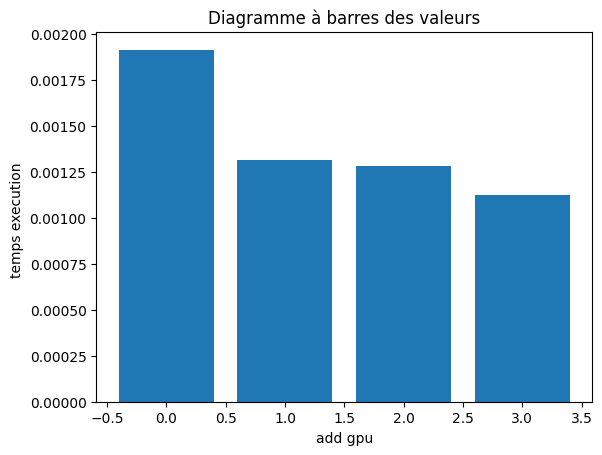

In [ ]:
import matplotlib.pyplot as plt

indices = range(len(add_gpu3))

plt.bar(indices, add_gpu3,label=platform)

plt.xlabel('add gpu')
plt.ylabel('temps execution ')

# Ajoutez des titres au graphique
plt.title('Diagramme à barres des valeurs')

# Affichez le graphique
plt.show()


### afficher les 4 valeurs de l'operation add en mode cpu pour les matrices (3x3) 

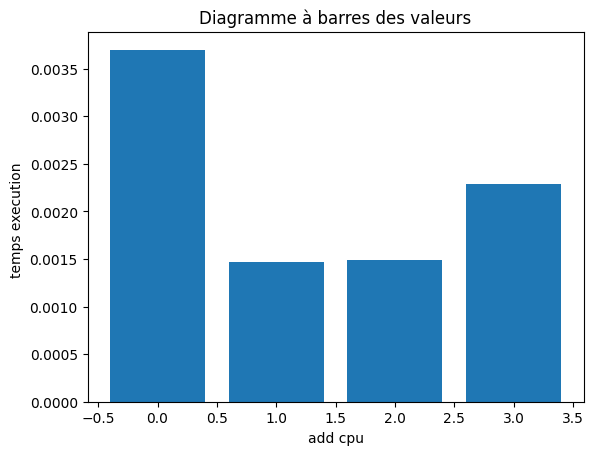

In [ ]:
indices = range(len(addd_cpu3))

plt.bar(indices, addd_cpu3,label=platform)

plt.xlabel('add cpu')
plt.ylabel('temps execution ')

# Ajoutez des titres au graphique
plt.title('Diagramme à barres des valeurs')

# Affichez le graphique
plt.show()

### afficher les 4 valeurs de l'operation prod en mode gpu pour les matrices (3x3) 

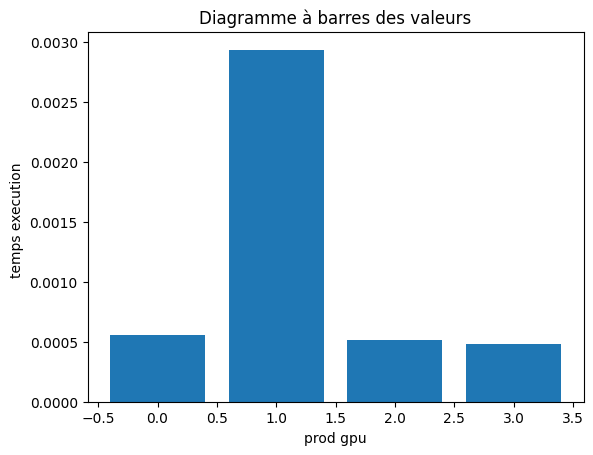

In [ ]:
indices = range(len(prodd_cpu3))

plt.bar(indices, prodd_cpu3,label=platform)

plt.xlabel('prod gpu')
plt.ylabel('temps execution ')

# Ajoutez des titres au graphique
plt.title('Diagramme à barres des valeurs')

# Affichez le graphique
plt.show()

### afficher les 4 valeurs pour tout les operation  en mode gpu et gpu pour les matrices (3x3) 

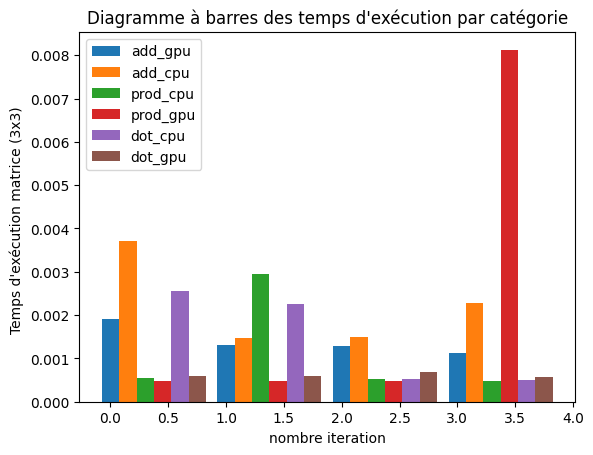

In [ ]:
import matplotlib.pyplot as plt

indices = range(len(add_gpu3))
CTEs = [moyenne_add_cpu_times3, moyenne_prod_cpu_times3, moyenne_dot_cpu_times3]
# Largeur des barres
bar_width = 0.15

# Créez les diagrammes à barres pour chaque catégorie
plt.bar(indices, add_gpu3, width=bar_width, label='add_gpu')
#plt.xticks(CTEs)
#plt.xticklabels()
#plt.bar(indices, CTEs, yerr=add_gpu, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.bar([i + bar_width for i in indices], addd_cpu3, width=bar_width, label='add_cpu')
plt.bar([i + 2 * bar_width for i in indices], prodd_cpu3, width=bar_width, label='prod_cpu')
plt.bar([i + 3 * bar_width for i in indices], prod_gpu3, width=bar_width, label='prod_gpu')
plt.bar([i + 4 * bar_width for i in indices], dott_cpu3, width=bar_width, label='dot_cpu')
plt.bar([i + 5 * bar_width for i in indices], dott_gpu3, width=bar_width, label='dot_gpu')

# Ajoutez des étiquettes aux axes
plt.xlabel('nombre iteration')
plt.ylabel("Temps d'exécution matrice (3x3) ")

# Ajoutez des titres au graphique
plt.title("Diagramme à barres des temps d'exécution par catégorie")

# Ajoutez une légende pour identifier les séries de données
plt.legend()

# Affichez le graphique
plt.show()


## comparaision en colab_cpu et colab_gpu

## operation add (data viz)

In [ ]:
dimension_matrice = ['3x3', '5x5', '7x7']
mode_platform=["colab_cpu","colab_gpu"]
x_pos = np.arange(len(dimension_matrice))
moyenne_add_cpu= [moyenne_add_cpu_times3, moyenne_add_cpu_times5,moyenne_add_cpu_times7]
moyenne_add_gpu= [moyenne_add_gpu_times5,moyenne_add_gpu_times5, moyenne_add_gpu_times7]

ecartype_add_cpu = [ecart_type_add_cpu_times3, ecart_type_add_cpu_times5,ecart_type_add_cpu_times7]
ecartype_add_gpu = [ecart_type_add_gpu_times3,ecart_type_add_gpu_times5, ecart_type_add_gpu_times7]

<ipython-input-194-1fa9ea6a28ae>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


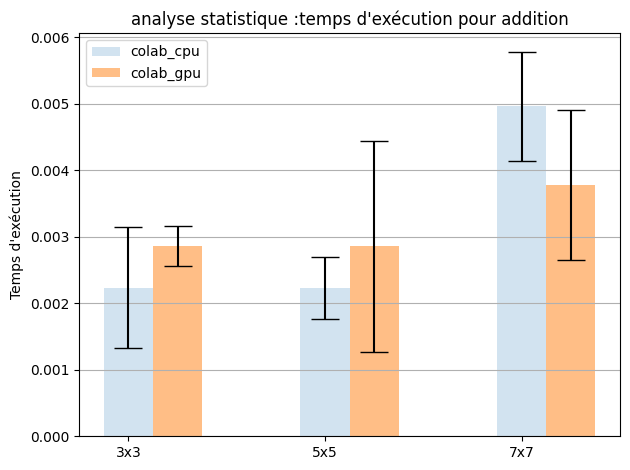

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.25
indices = range(len(dimension_matrice))

fig, ax = plt.subplots(layout='constrained')
ax.bar(dimension_matrice, moyenne_add_cpu, yerr=ecartype_add_cpu, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_add_gpu, yerr=ecartype_add_gpu,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour addition")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_add_bars.png')
plt.show()

## operation dot (data viz)

In [ ]:
from numpy.ma.core import dot
moyenne_dot_cpu= [moyenne_dot_cpu_times3, moyenne_dot_cpu_times5,moyenne_dot_cpu_times7]
moyenne_dot_gpu= [moyenne_dot_gpu_times5,moyenne_dot_gpu_times5, moyenne_dot_gpu_times7]

ecartype_dot_cpu = [ecart_type_dot_cpu_times3, ecart_type_dot_cpu_times5,ecart_type_dot_cpu_times7]
ecartype_dot_gpu = [ecart_type_dot_gpu_times3,ecart_type_dot_gpu_times5, ecart_type_dot_gpu_times7]

<ipython-input-196-c84308350ccc>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


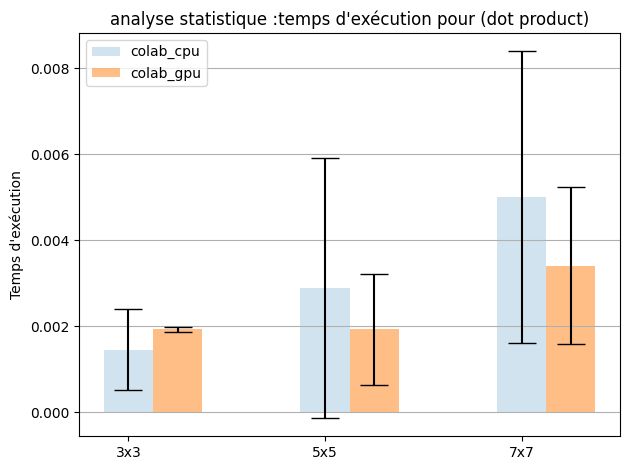

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.25
indices = range(len(dimension_matrice))

fig, ax = plt.subplots(layout='constrained')
ax.bar(dimension_matrice, moyenne_dot_cpu, yerr=ecartype_dot_cpu, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_dot_gpu, yerr=ecartype_dot_gpu,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour (dot product)")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_dot_bars.png')
plt.show()

## operation prod (data viz)

In [ ]:
moyenne_prod_cpu= [moyenne_prod_cpu_times3, moyenne_prod_cpu_times5,moyenne_prod_cpu_times7]
moyenne_prod_gpu= [moyenne_prod_gpu_times5,moyenne_prod_gpu_times5, moyenne_prod_gpu_times7]

ecartype_prod_cpu = [ecart_type_prod_cpu_times3, ecart_type_prod_cpu_times5,ecart_type_prod_cpu_times7]
ecartype_prod_gpu = [ecart_type_prod_gpu_times3,ecart_type_prod_gpu_times5, ecart_type_prod_gpu_times7]

<ipython-input-198-9cdda0ec78b5>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


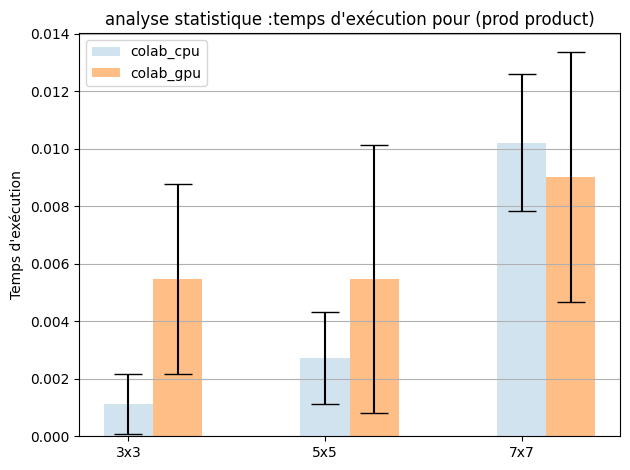

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.25
indices = range(len(dimension_matrice))

fig, ax = plt.subplots(layout='constrained')
ax.bar(dimension_matrice, moyenne_prod_cpu, yerr=ecartype_prod_cpu, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_prod_gpu, yerr=ecartype_prod_gpu,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour (prod product)")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_prod_bars.png')
plt.show()

# export data(moyenne,ecartype) en csv (experience colab)

In [212]:
import csv

# Nom des colonnes
colonnes_add = ["moyenne_add_cpu", "moyenne_add_gpu", "ecartype_add_cpu", "ecartype_add_gpu"]

# Créer un fichier CSV et écrire les données
with open('donnees_colab_add.csv', mode='w', newline='') as fichier_csv:
    writer = csv.writer(fichier_csv)

    # Écrire la première ligne avec les noms de colonnes
    writer.writerow(colonnes_add)

    # Écrire les données ligne par ligne
    for i in range(len(moyenne_add_cpu)):
        ligne = [
            moyenne_add_cpu[i],
            moyenne_add_gpu[i],
            ecartype_add_cpu[i],
            ecartype_add_gpu[i]
        ]
        writer.writerow(ligne)

# Le fichier CSV "donnees.csv" contient maintenant vos données extraites.


In [213]:
colonnes_dot = ["moyenne_dot_cpu", "moyenne_dot_gpu", "ecartype_dot_cpu", "ecartype_dot_gpu"]

with open('donnees_colab_dot.csv', mode='w', newline='') as fichier_csv:
    writer = csv.writer(fichier_csv)

    writer.writerow(colonnes_dot)

    for i in range(len(moyenne_dot_cpu)):
        ligne = [
            moyenne_dot_cpu[i],
            moyenne_dot_gpu[i],
            ecartype_dot_cpu[i],
            ecartype_dot_gpu[i]
        ]
        writer.writerow(ligne)

In [214]:
colonnes_prod = ["moyenne_prod_cpu", "moyenne_prod_gpu", "ecartype_prod_cpu", "ecartype_prod_gpu"]

with open('donnees_colab_prod.csv', mode='w', newline='') as fichier_csv:
    writer = csv.writer(fichier_csv)
    writer.writerow(colonnes_prod)

    for i in range(len(moyenne_prod_cpu)):
        ligne = [
            moyenne_prod_cpu[i],
            moyenne_prod_gpu[i],
            ecartype_prod_cpu[i],
            ecartype_prod_gpu[i]
        ]
        writer.writerow(ligne)

#test data viz

###La convolution :
La cnvolution est la base des réseau neuronal convolutif.
Comme le montre la figure ci-dessous, la convolution (à deux dimensions dans nôtre cas) consiste à appliquer un filtre 2D (également appelé noyau) sur une matrice d'une taille plus grande, en appliquant une multiplication élément à élément, suivie d'une somme des résultats de multiplication.
En plus de la matrice en entrée et du filtre, la convolution prend également un pas (*stride* en anglais) et une marge (*padding* en anglais). Le pas contrôle le mouvement du filtre sur la matrice en entrée tandis que la marge spécifie le nombre de lignes/colonnes contenant des zéros à ajouter à la frontière de la matrice en entrée. Dans l'exemple ci-dessous, le pas et la marge sont fixés à 1.
![](https://i.stack.imgur.com/9OZKF.gif)

***Exercice*** :
1. Proposez deux implémentations d'une convolution 2D tel que:
  - `my_2D_Conv_CPU(matrix, kernel, stride, padding)` une convolution 2D sur CPU
  - `my_2D_Conv_CPU(matrix, kernel, stride, padding)` une convolution 2D sur GPU
avec `matrix` la matrice en entrée, `kernel` qui est le filtre, le pas `stride`, et la marge `padding`.  
Afin de tester votre implémentation, ajuster les valeurs du `stride` et du `padding` afin de garder les mêmes dimensions de la matrice en entrée après l'application de la convolution.
2. Proposez une implémentation d'une fonction de visualisation d'une matrice sous forme d'image. Pour ceci, vous pouvez utiliser la fonction `imshow()` de `pyplot`.
3. Toujours en s'assurant que les dimensions de l'image en sortie restent les mêmes après la convolution, suivez l'exemple ci-dessous en testant votre implémentation sur l'image donnée dans l'exemple avec les filtres suivants :  
$$a = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix}$$  
$$b = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$  
$$c = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{bmatrix}$$
4. Affichez les images avant et aprés la comnvolution. Que remarquiez-vous?
5. Refaites le même traitement avec les fltres $a$, $b$, et $c$ en changeant leur taille comme suit : 5x5, 7x7, et en ajustant les veleurs du `du stride` et du `padding`.
6. Comparez les temps d'exécution des deux implémentations de la convolution, CPU vs GPU sous forme d'histogramme.


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib as pl
from google.colab.patches import cv2_imshow

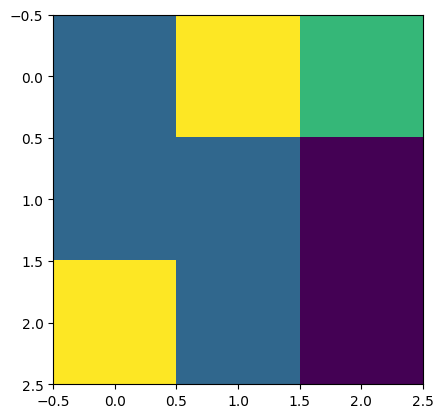

In [ ]:
m1 =  torch.randint(1, 5, (3, 3))
m2 =  torch.randint(1, 5, (3, 3))
a = np.random.rand(1,5)
pl.pyplot.imshow(m1)

In [ ]:
 im=m1
 print(im)

tensor([[2, 4, 3],
        [2, 2, 1],
        [4, 2, 1]])


In [ ]:
h= np.ones((3,3),np.float32)/9
def convolution(matrice, size=(3,3)):
  d=size[0]
  m1=matrice.numpy()
  im=m1.copy()
  kernel = np.ones((d,d),np.float32)
  v= int((d-1)/2)
  s=0
  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      s=0
      for n in range(-v,v+1):
        for m in range(-v,v+1):
         if (i-n<im.shape[0] and j-m<im.shape[1]):
          s=s+im[i-n][j-m]*kernel[n][m]
          im[i][j]=s
  return im

In [ ]:
import numpy as np

def convolution1(matrice, size=(3, 3), padding=0, stride=1):
    d = size[0]
    m1 = matrice.numpy()
    im = m1.copy()
    kernel = np.ones((d, d), np.float32)
    v = int((d - 1) / 2)
    s = 0
    result = []

    # Déterminer la taille de la matrice de sortie en fonction du padding et du stride
    output_size = ((matrice.shape[0] + 2 * padding - d) // stride + 1,
                   (matrice.shape[1] + 2 * padding - d) // stride + 1)

    # Ajouter le padding
    if padding > 0:
        padded_matrice = np.pad(matrice, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    else:
        padded_matrice = matrice

    for i in range(0, padded_matrice.shape[0] - d + 1, stride):
        for j in range(0, padded_matrice.shape[1] - d + 1, stride):
            s = 0
            for n in range(-v, v + 1):
                for m in range(-v, v + 1):
                    s = s + padded_matrice[i + n][j + m] * kernel[n][m]
            result.append(s)

    # Transformer le résultat en une matrice de sortie
    output_matrix = np.array(result).reshape(output_size)

    return output_matrix


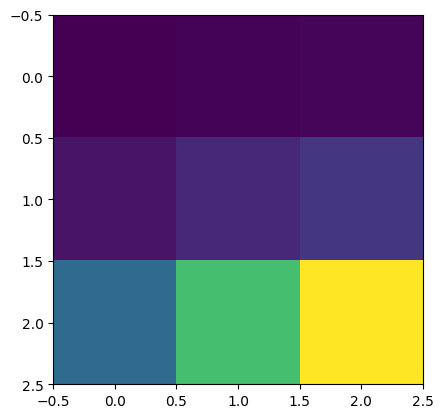

In [ ]:
fm=convolution(m1,(3,3))
pl.pyplot.imshow(fm)

In [ ]:
fm.shape

(3, 3)

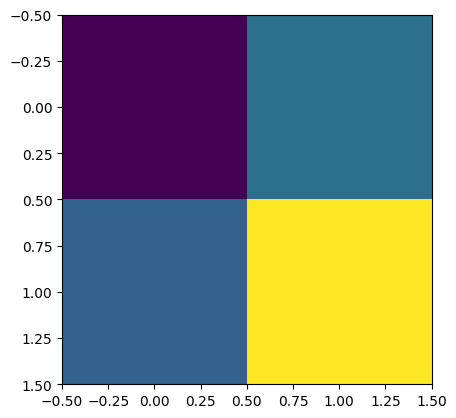

In [ ]:
fm1=convolution1(m1,(3,3),1,2)
pl.pyplot.imshow(fm1)

In [ ]:
fm1.shape

(2, 2)

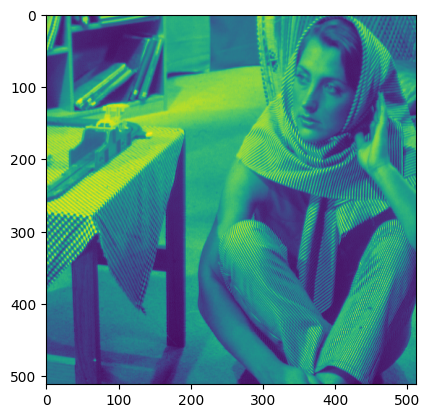

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from torchvision import transforms
import numpy as np

img = Image.open(urllib.request.urlopen("http://decsai.ugr.es/cvg/CG/images/base/1.gif"))
x = np.array(img.getdata(), np.uint8).reshape(img.size[1], img.size[0])
plt.imshow(x)